## Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import datetime

## Bussiness Understanding

## Data Understanding

In [2]:
song_df = pd.read_csv('data.csv')
song_df = pd.DataFrame(song_df)
song_df

,Unnamed: 0,id,name,album,artist,release_date,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,year
0,0,748mdHapucXQri7IAO8yFK,Kiss Me More (feat. SZA),Kiss Me More (feat. SZA),Doja Cat,2021-04-09,208866,96,0.762,0.23500,0.762,0.701,0.000158,0.1230,-3.541,0.0286,110.968,2021
1,1,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),Levitating (feat. DaBaby),Dua Lipa,2020-10-01,203064,91,0.702,0.00883,0.702,0.825,0.000000,0.0674,-3.787,0.0601,102.977,2020
2,2,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,198081,100,0.677,0.32100,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,2021
3,3,37BZB0z9T8Xu7U3e65qxFy,Save Your Tears (with Ariana Grande) (Remix),Save Your Tears (Remix),The Weeknd,2021-04-23,191013,92,0.650,0.02150,0.650,0.825,0.000024,0.0936,-4.645,0.0325,118.091,2021
4,4,3BZEcbdtXQSo7OrvKRJ6mb,MONTERO (Call Me By Your Name),MONTERO (Call Me By Your Name),Lil Nas X,2021-03-26,137875,88,0.610,0.29700,0.610,0.508,0.000000,0.3840,-6.682,0.1520,178.818,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,11501,1cy5US2dffz6QGBAIzOGkq,I'll Be Loving You (Forever),Hangin' Tough,New Kids On The Block,1988-09-02,263933,60,0.597,0.28500,0.597,0.282,0.000000,0.1050,-17.230,0.0256,134.797,1988
8581,11502,54b8qPFqYqIndfdxiLApea,Alone,Bad Animals,Heart,1987-06-06,218733,73,0.418,0.63800,0.418,0.452,0.000260,0.0959,-13.099,0.0356,175.088,1987
8582,11504,36lkJSDyMEZoWTqtRj8Q8q,You're the Inspiration - 2006 Remaster,Chicago 17 (Expanded & Remastered),Chicago,1984-05-14,229240,72,0.583,0.36800,0.583,0.602,0.000000,0.2200,-6.364,0.0274,74.008,1984
8583,11505,5fnOrhQ4KgT5irGCjIccGH,Arthur's Theme (Best That You Can Do),Arthur - The Album [Original Soundtrack],Various Artists,1981,234493,69,0.526,0.16900,0.526,0.515,0.000816,0.1810,-11.169,0.0389,136.543,1981


In [3]:
song_df = song_df.drop(['Unnamed: 0'], axis=1)
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8585 entries, 0 to 8584
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8585 non-null   object 
 1   name              8585 non-null   object 
 2   album             8585 non-null   object 
 3   artist            8585 non-null   object 
 4   release_date      8585 non-null   object 
 5   duration_ms       8585 non-null   int64  
 6   popularity        8585 non-null   int64  
 7   danceability      8585 non-null   float64
 8   acousticness      8585 non-null   float64
 9   danceability.1    8585 non-null   float64
 10  energy            8585 non-null   float64
 11  instrumentalness  8585 non-null   float64
 12  liveness          8585 non-null   float64
 13  loudness          8585 non-null   float64
 14  speechiness       8585 non-null   float64
 15  tempo             8585 non-null   float64
 16  year              8585 non-null   int64  


In [4]:
song_df.isnull().sum()

id                  0
name                0
album               0
artist              0
release_date        0
duration_ms         0
popularity          0
danceability        0
acousticness        0
danceability.1      0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
year                0
dtype: int64

In [5]:
song_df.duplicated().sum()

0

In [6]:
yr = datetime.datetime.now().year

song_df['year'] = song_df['release_date'].str.extract(r'(\d{4})')

# Pastikan kolom "year" dalam bentuk integer
song_df['year'] = song_df['year'].astype(int)

song_df['age'] = yr - song_df['year']

song_df

,id,name,album,artist,release_date,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,year,age
0,748mdHapucXQri7IAO8yFK,Kiss Me More (feat. SZA),Kiss Me More (feat. SZA),Doja Cat,2021-04-09,208866,96,0.762,0.23500,0.762,0.701,0.000158,0.1230,-3.541,0.0286,110.968,2021,2
1,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),Levitating (feat. DaBaby),Dua Lipa,2020-10-01,203064,91,0.702,0.00883,0.702,0.825,0.000000,0.0674,-3.787,0.0601,102.977,2020,3
2,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,198081,100,0.677,0.32100,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,2021,2
3,37BZB0z9T8Xu7U3e65qxFy,Save Your Tears (with Ariana Grande) (Remix),Save Your Tears (Remix),The Weeknd,2021-04-23,191013,92,0.650,0.02150,0.650,0.825,0.000024,0.0936,-4.645,0.0325,118.091,2021,2
4,3BZEcbdtXQSo7OrvKRJ6mb,MONTERO (Call Me By Your Name),MONTERO (Call Me By Your Name),Lil Nas X,2021-03-26,137875,88,0.610,0.29700,0.610,0.508,0.000000,0.3840,-6.682,0.1520,178.818,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,1cy5US2dffz6QGBAIzOGkq,I'll Be Loving You (Forever),Hangin' Tough,New Kids On The Block,1988-09-02,263933,60,0.597,0.28500,0.597,0.282,0.000000,0.1050,-17.230,0.0256,134.797,1988,35
8581,54b8qPFqYqIndfdxiLApea,Alone,Bad Animals,Heart,1987-06-06,218733,73,0.418,0.63800,0.418,0.452,0.000260,0.0959,-13.099,0.0356,175.088,1987,36
8582,36lkJSDyMEZoWTqtRj8Q8q,You're the Inspiration - 2006 Remaster,Chicago 17 (Expanded & Remastered),Chicago,1984-05-14,229240,72,0.583,0.36800,0.583,0.602,0.000000,0.2200,-6.364,0.0274,74.008,1984,39
8583,5fnOrhQ4KgT5irGCjIccGH,Arthur's Theme (Best That You Can Do),Arthur - The Album [Original Soundtrack],Various Artists,1981,234493,69,0.526,0.16900,0.526,0.515,0.000816,0.1810,-11.169,0.0389,136.543,1981,42


In [7]:
df_2 = song_df.drop(['id','name','album','artist','release_date'], axis=1)
corr = df_2.corr()
corr.style.background_gradient(cmap='coolwarm')

,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,year,age
duration_ms,1.000000,-0.211132,-0.244512,0.197922,-0.244512,-0.167231,0.128165,0.031432,-0.276382,-0.096522,-0.022935,-0.169958,0.169958
popularity,-0.211132,1.000000,0.232081,-0.359469,0.232081,0.198647,-0.143708,-0.054972,0.271391,0.075667,0.012628,0.223879,-0.223879
danceability,-0.244512,0.232081,1.000000,-0.453445,1.000000,0.380163,-0.147922,-0.068086,0.360539,0.233484,-0.040991,0.221345,-0.221345
acousticness,0.197922,-0.359469,-0.453445,1.000000,-0.453445,-0.662712,0.122146,-0.003119,-0.509497,-0.192835,-0.095724,-0.306466,0.306466
danceability.1,-0.244512,0.232081,1.000000,-0.453445,1.000000,0.380163,-0.147922,-0.068086,0.360539,0.233484,-0.040991,0.221345,-0.221345
energy,-0.167231,0.198647,0.380163,-0.662712,0.380163,1.000000,-0.157066,0.133860,0.757597,0.264312,0.109770,0.183565,-0.183565
instrumentalness,0.128165,-0.143708,-0.147922,0.122146,-0.147922,-0.157066,1.000000,-0.005662,-0.384390,-0.090041,0.009766,-0.078292,0.078292
liveness,0.031432,-0.054972,-0.068086,-0.003119,-0.068086,0.133860,-0.005662,1.000000,0.065032,0.073396,0.000731,-0.120482,0.120482
loudness,-0.276382,0.271391,0.360539,-0.509497,0.360539,0.757597,-0.384390,0.065032,1.000000,0.155941,0.080501,0.285986,-0.285986
speechiness,-0.096522,0.075667,0.233484,-0.192835,0.233484,0.264312,-0.090041,0.073396,0.155941,1.000000,0.099916,0.079289,-0.079289


Berdasarkan visualisasi tersebut, fitur yang memiliki korelasi tertinggi adalah Energy dan loudness.

/tmp/ipykernel_12761/1197949878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_df['popularity']).set_title('Popularity Distribution')
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Text(0.5, 1.0, 'Popularity Distribution')

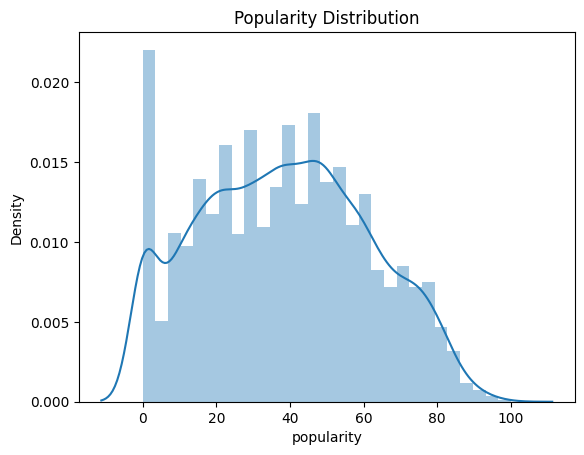

In [8]:
#target value is popularity
sns.distplot(song_df['popularity']).set_title('Popularity Distribution')

In [9]:
#as we see on the graph max. denisty rises after 50, thus making popularity into binary value
song_df.loc[song_df['popularity'] < 50, 'popularity'] = 0 
song_df.loc[song_df['popularity'] >= 50, 'popularity'] = 1
song_df.loc[song_df['popularity'] == 1]

,id,name,album,artist,release_date,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,year,age
0,748mdHapucXQri7IAO8yFK,Kiss Me More (feat. SZA),Kiss Me More (feat. SZA),Doja Cat,2021-04-09,208866,1,0.762,0.23500,0.762,0.701,0.000158,0.1230,-3.541,0.0286,110.968,2021,2
1,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),Levitating (feat. DaBaby),Dua Lipa,2020-10-01,203064,1,0.702,0.00883,0.702,0.825,0.000000,0.0674,-3.787,0.0601,102.977,2020,3
2,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,198081,1,0.677,0.32100,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,2021,2
3,37BZB0z9T8Xu7U3e65qxFy,Save Your Tears (with Ariana Grande) (Remix),Save Your Tears (Remix),The Weeknd,2021-04-23,191013,1,0.650,0.02150,0.650,0.825,0.000024,0.0936,-4.645,0.0325,118.091,2021,2
4,3BZEcbdtXQSo7OrvKRJ6mb,MONTERO (Call Me By Your Name),MONTERO (Call Me By Your Name),Lil Nas X,2021-03-26,137875,1,0.610,0.29700,0.610,0.508,0.000000,0.3840,-6.682,0.1520,178.818,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,1cy5US2dffz6QGBAIzOGkq,I'll Be Loving You (Forever),Hangin' Tough,New Kids On The Block,1988-09-02,263933,1,0.597,0.28500,0.597,0.282,0.000000,0.1050,-17.230,0.0256,134.797,1988,35
8581,54b8qPFqYqIndfdxiLApea,Alone,Bad Animals,Heart,1987-06-06,218733,1,0.418,0.63800,0.418,0.452,0.000260,0.0959,-13.099,0.0356,175.088,1987,36
8582,36lkJSDyMEZoWTqtRj8Q8q,You're the Inspiration - 2006 Remaster,Chicago 17 (Expanded & Remastered),Chicago,1984-05-14,229240,1,0.583,0.36800,0.583,0.602,0.000000,0.2200,-6.364,0.0274,74.008,1984,39
8583,5fnOrhQ4KgT5irGCjIccGH,Arthur's Theme (Best That You Can Do),Arthur - The Album [Original Soundtrack],Various Artists,1981,234493,1,0.526,0.16900,0.526,0.515,0.000816,0.1810,-11.169,0.0389,136.543,1981,42


In [10]:
# col = ['name']
# regex = r'[.,()-]'

# # for i in col:
# # #     print(i.str.replace("$$","ss"))
# #     song_df[i] = song_df[i].str.replace(regex, '')

song_df['name'] = song_df['name'].str.replace(r'[.,()-]', '', regex=True)
song_df['album'] = song_df['album'].str.replace(r'[.,()-]', '', regex=True)


song_df

,id,name,album,artist,release_date,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,year,age
0,748mdHapucXQri7IAO8yFK,Kiss Me More feat SZA,Kiss Me More feat SZA,Doja Cat,2021-04-09,208866,1,0.762,0.23500,0.762,0.701,0.000158,0.1230,-3.541,0.0286,110.968,2021,2
1,463CkQjx2Zk1yXoBuierM9,Levitating feat DaBaby,Levitating feat DaBaby,Dua Lipa,2020-10-01,203064,1,0.702,0.00883,0.702,0.825,0.000000,0.0674,-3.787,0.0601,102.977,2020,3
2,4iJyoBOLtHqaGxP12qzhQI,Peaches feat Daniel Caesar & Giveon,Justice,Justin Bieber,2021-03-19,198081,1,0.677,0.32100,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,2021,2
3,37BZB0z9T8Xu7U3e65qxFy,Save Your Tears with Ariana Grande Remix,Save Your Tears Remix,The Weeknd,2021-04-23,191013,1,0.650,0.02150,0.650,0.825,0.000024,0.0936,-4.645,0.0325,118.091,2021,2
4,3BZEcbdtXQSo7OrvKRJ6mb,MONTERO Call Me By Your Name,MONTERO Call Me By Your Name,Lil Nas X,2021-03-26,137875,1,0.610,0.29700,0.610,0.508,0.000000,0.3840,-6.682,0.1520,178.818,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,1cy5US2dffz6QGBAIzOGkq,I'll Be Loving You Forever,Hangin' Tough,New Kids On The Block,1988-09-02,263933,1,0.597,0.28500,0.597,0.282,0.000000,0.1050,-17.230,0.0256,134.797,1988,35
8581,54b8qPFqYqIndfdxiLApea,Alone,Bad Animals,Heart,1987-06-06,218733,1,0.418,0.63800,0.418,0.452,0.000260,0.0959,-13.099,0.0356,175.088,1987,36
8582,36lkJSDyMEZoWTqtRj8Q8q,You're the Inspiration 2006 Remaster,Chicago 17 Expanded & Remastered,Chicago,1984-05-14,229240,1,0.583,0.36800,0.583,0.602,0.000000,0.2200,-6.364,0.0274,74.008,1984,39
8583,5fnOrhQ4KgT5irGCjIccGH,Arthur's Theme Best That You Can Do,Arthur The Album [Original Soundtrack],Various Artists,1981,234493,1,0.526,0.16900,0.526,0.515,0.000816,0.1810,-11.169,0.0389,136.543,1981,42


In [11]:
boolean = song_df['name'].duplicated().any() 
boolean #As boolean is true there is duplicate values

True

In [12]:
data = pd.DataFrame(song_df,
                #   columns = ['artist_name','track_name', 'popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','mode','key','time_signature','speechiness','tempo','valence'])
                  columns = ['name',	'album', 'artist', 'duration_ms',	'popularity', 'danceability', 'acousticness','danceability.1', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'year', 'age'])
duplicate = data[data.duplicated()]
duplicate

,name,album,artist,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,year,age
418,MONTERO Call Me By Your Name,MONTERO Call Me By Your Name,Lil Nas X,137875,1,0.610,0.29700,0.610,0.508,0.000000,0.3840,-6.682,0.1520,178.818,2021,2
918,Jala Jala Jalapaatham Nuvvu,Uppena,Devi Sri Prasad,252065,1,0.679,0.85300,0.679,0.457,0.000402,0.0974,-9.084,0.0373,91.988,2021,2
948,Gaandakannazhagi,Namma Veettu Pillai Original Motion Picture So...,D. Imman,243520,0,0.731,0.13200,0.731,0.872,0.000000,0.1210,-3.617,0.1310,128.003,2019,4
1718,cold/mess,cold / mess,Prateek Kuhad,281218,0,0.509,0.28500,0.509,0.479,0.017500,0.1670,-6.601,0.0262,145.967,2018,5
2649,Leave A Little Love,Leave A Little Love,Alesso,187029,1,0.671,0.00437,0.671,0.855,0.000000,0.1310,-4.254,0.0375,117.980,2021,2
2671,AOK,AOK,Tai Verdes,173640,1,0.731,0.12500,0.731,0.626,0.000000,0.1830,-6.919,0.0805,82.488,2021,2
4868,Kahaani,Sabar,Shadow and Light,260256,0,0.629,0.50800,0.629,0.451,0.000947,0.0700,-10.076,0.0271,116.966,2018,5
4998,Enna Vilai,Kadhalar Dhinam,A.R. Rahman,355207,0,0.568,0.10600,0.568,0.581,0.000000,0.1250,-13.044,0.0553,149.984,1999,24
5191,Whattey Beauty Telugu,Bheeshma,Mahati Swara Sagar,234782,0,0.908,0.31700,0.908,0.895,0.000051,0.1420,-3.161,0.0826,120.776,2020,3
6204,DDUDU DDUDU,SQUARE UP,BLACKPINK,209355,0,0.671,0.03130,0.671,0.859,0.000000,0.2670,-3.922,0.0833,139.931,2018,5


In [13]:
#droping duplicate values
data.drop_duplicates('name', inplace = True)

In [14]:
boolean = data['name'].duplicated().any() 
boolean #As boolean is true there is duplicate values

False

In [15]:
data

,name,album,artist,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,year,age
0,Kiss Me More feat SZA,Kiss Me More feat SZA,Doja Cat,208866,1,0.762,0.23500,0.762,0.701,0.000158,0.1230,-3.541,0.0286,110.968,2021,2
1,Levitating feat DaBaby,Levitating feat DaBaby,Dua Lipa,203064,1,0.702,0.00883,0.702,0.825,0.000000,0.0674,-3.787,0.0601,102.977,2020,3
2,Peaches feat Daniel Caesar & Giveon,Justice,Justin Bieber,198081,1,0.677,0.32100,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,2021,2
3,Save Your Tears with Ariana Grande Remix,Save Your Tears Remix,The Weeknd,191013,1,0.650,0.02150,0.650,0.825,0.000024,0.0936,-4.645,0.0325,118.091,2021,2
4,MONTERO Call Me By Your Name,MONTERO Call Me By Your Name,Lil Nas X,137875,1,0.610,0.29700,0.610,0.508,0.000000,0.3840,-6.682,0.1520,178.818,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,I'll Be Loving You Forever,Hangin' Tough,New Kids On The Block,263933,1,0.597,0.28500,0.597,0.282,0.000000,0.1050,-17.230,0.0256,134.797,1988,35
8581,Alone,Bad Animals,Heart,218733,1,0.418,0.63800,0.418,0.452,0.000260,0.0959,-13.099,0.0356,175.088,1987,36
8582,You're the Inspiration 2006 Remaster,Chicago 17 Expanded & Remastered,Chicago,229240,1,0.583,0.36800,0.583,0.602,0.000000,0.2200,-6.364,0.0274,74.008,1984,39
8583,Arthur's Theme Best That You Can Do,Arthur The Album [Original Soundtrack],Various Artists,234493,1,0.526,0.16900,0.526,0.515,0.000816,0.1810,-11.169,0.0389,136.543,1981,42


In [16]:
data['popularity'].unique()

array([1, 0])

/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


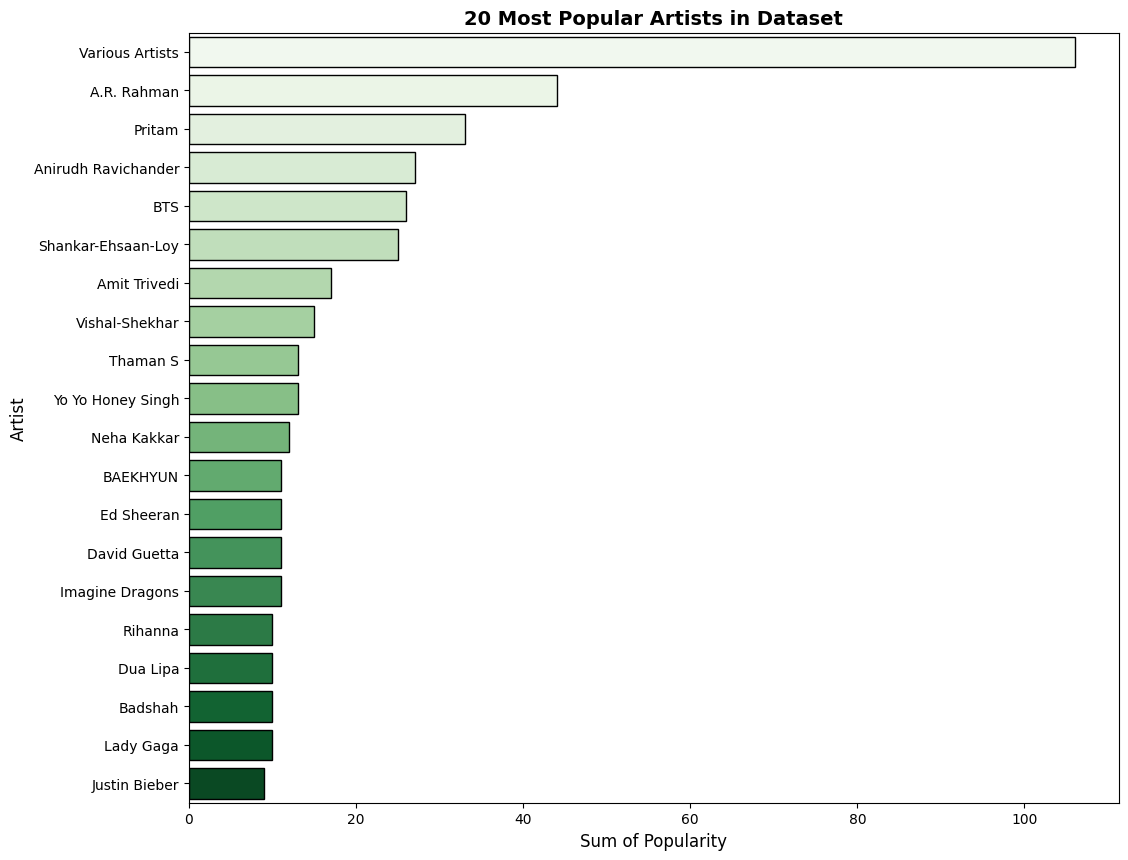

In [17]:
# # Plotting
df=data
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('artist')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Greens", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', fontsize=14, weight = 'bold')
plt.show()

/tmp/ipykernel_12761/2893074555.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['count'], bins = 300)
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

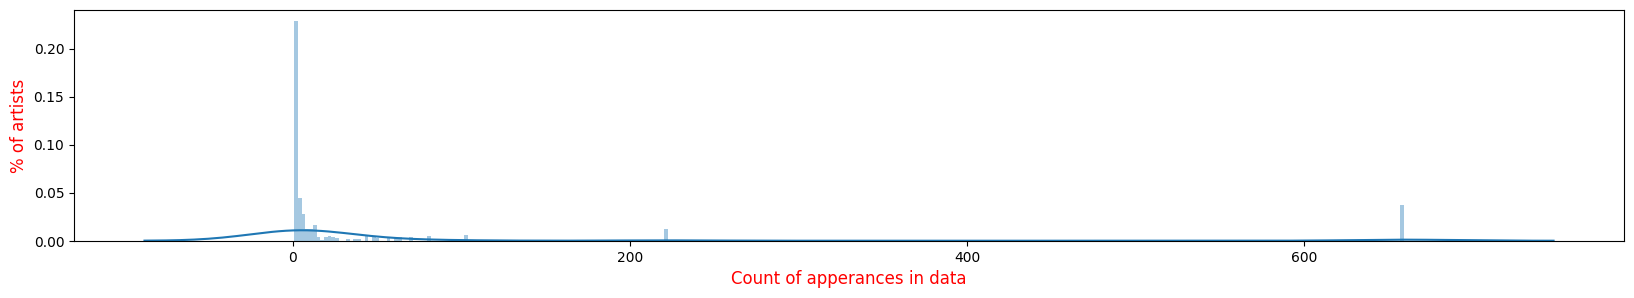

In [18]:
df['mean'] = df.groupby('artist')['popularity'].transform('mean')
df['count'] = df.groupby('artist')['popularity'].transform('count')
# plotting
fig, ax = plt.subplots(figsize = (20, 3))
ax = sns.distplot(df['count'], bins = 300)
ax.set_xlabel('Count of apperances in data', fontsize=12, color='r')
ax.set_ylabel('% of artists', fontsize=12, color='r')
plt.show()

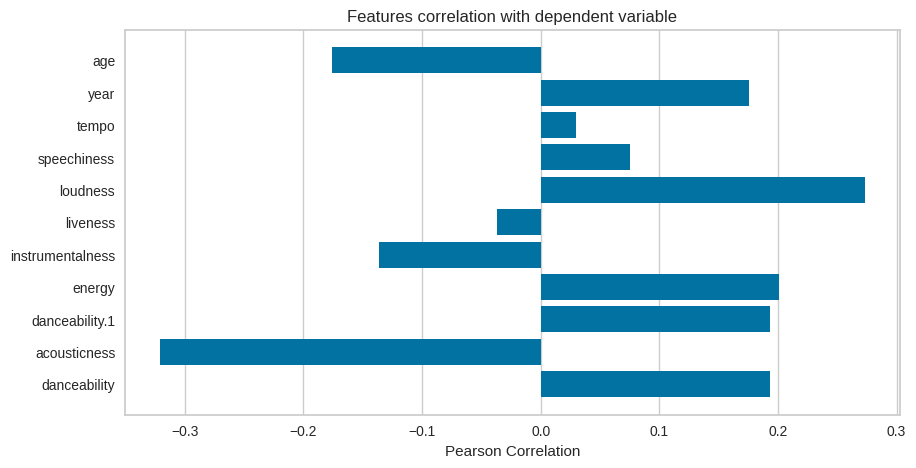

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [19]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['danceability', 'acousticness', 'danceability.1', 
                 'energy', 'instrumentalness', 'liveness', 'loudness',
                 'speechiness', 'tempo', 'year', 'age']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [20]:
data['history'] = (data['artist'] == 'Justin Bieber').astype(int)
data['history'] = (data['artist'] == 'Dua Lipa').astype(int)

data

,name,album,artist,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,year,age,mean,count,history
0,Kiss Me More feat SZA,Kiss Me More feat SZA,Doja Cat,208866,1,0.762,0.23500,0.762,0.701,0.000158,0.1230,-3.541,0.0286,110.968,2021,2,1.00000,6,0
1,Levitating feat DaBaby,Levitating feat DaBaby,Dua Lipa,203064,1,0.702,0.00883,0.702,0.825,0.000000,0.0674,-3.787,0.0601,102.977,2020,3,1.00000,10,1
2,Peaches feat Daniel Caesar & Giveon,Justice,Justin Bieber,198081,1,0.677,0.32100,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,2021,2,0.90000,10,0
3,Save Your Tears with Ariana Grande Remix,Save Your Tears Remix,The Weeknd,191013,1,0.650,0.02150,0.650,0.825,0.000024,0.0936,-4.645,0.0325,118.091,2021,2,1.00000,4,0
4,MONTERO Call Me By Your Name,MONTERO Call Me By Your Name,Lil Nas X,137875,1,0.610,0.29700,0.610,0.508,0.000000,0.3840,-6.682,0.1520,178.818,2021,2,1.00000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,I'll Be Loving You Forever,Hangin' Tough,New Kids On The Block,263933,1,0.597,0.28500,0.597,0.282,0.000000,0.1050,-17.230,0.0256,134.797,1988,35,1.00000,1,0
8581,Alone,Bad Animals,Heart,218733,1,0.418,0.63800,0.418,0.452,0.000260,0.0959,-13.099,0.0356,175.088,1987,36,1.00000,1,0
8582,You're the Inspiration 2006 Remaster,Chicago 17 Expanded & Remastered,Chicago,229240,1,0.583,0.36800,0.583,0.602,0.000000,0.2200,-6.364,0.0274,74.008,1984,39,1.00000,2,0
8583,Arthur's Theme Best That You Can Do,Arthur The Album [Original Soundtrack],Various Artists,234493,1,0.526,0.16900,0.526,0.515,0.000816,0.1810,-11.169,0.0389,136.543,1981,42,0.16085,659,0


In [21]:
data_new = data.drop(['artist','name','album'], axis=1)
train, test = train_test_split(data_new, test_size=0.3, random_state=42)

test = test.drop(['history'], axis=1).to_numpy()

liked_songs = train.loc[train['history'] == 1].drop(['history'], axis=1)
disliked_songs = train.loc[train['history'] == 0].drop(['history'], axis=1)

liked_songs_id = liked_songs.index
disliked_songs_id = disliked_songs.index

def normalize_2(arr):
    cols_mean, cols_stdev = arr.mean(axis=0), arr.std(axis=0)
    output = (arr - cols_mean) / cols_stdev
    return output

def get_track_features(idx_arr):
    track_features = []
    for idx in idx_arr:
        if idx in liked_songs_id:
            track = normalize_2(liked_songs.loc[idx].to_numpy())
        elif idx in disliked_songs_id:
            track = normalize_2(disliked_songs.loc[idx].to_numpy())
        
        if len(track) > 0:
            track_features.append(track)
    return np.array(track_features)

user_favorites = get_track_features(liked_songs_id)
user_dislikes = get_track_features(disliked_songs_id)

print('no. of popular songs: {0}\nno. of unpopular: {1}\n'.format(len(user_favorites), len(user_dislikes)))

from numpy import linalg as LA

fav_mean = user_favorites.mean(axis=0)

def top_5(tracks):
    cosine_similarities = [np.dot(fav_mean, sample)/(LA.norm(fav_mean)*LA.norm(sample)) for sample in tracks]
    zipped_similarities = zip(cosine_similarities, enumerate(tracks))
    sorted_similarities = sorted(zipped_similarities, reverse=True, key = lambda x: x[0])
    
    return [(idx,_similarity) for _similarity,(idx,_features) in sorted_similarities[0:5]]
        
print('Top 5 new tracks for user with their similatirity to popular songs : \n{}'.format(top_5(test)))

no. of popular songs: 9
no. of unpopular: 5693

Top 5 new tracks for user with their similatirity to popular songs : 
[(1196, 0.9659850988256535), (1556, 0.9659843848052005), (1337, 0.9659843658326969), (1947, 0.9659815825749283), (671, 0.9659809351711526)]


In [22]:
top_5_songs = top_5(test)

c=1
print('Top 5 new tracks for users with their similatirity to popular songs : \n')
for song in top_5_songs:
    id = song[0]
    similarity = song[1]
    print('{0}. {1}'.format(c, data.loc[data.index[id]]['name']), similarity, "\n")
    c = c+1

Top 5 new tracks for users with their similatirity to popular songs : 

1. Sooraj Ki Baahon Mein 0.9659850988256535 

2. Nayan Tarse 0.9659843848052005 

3. Tamma Tamma Again 0.9659843658326969 

4. Shades of Grey 0.9659815825749283 

5. Taaron Ke Shehar 0.9659809351711526 

